In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [25]:
dataset =pd.read_excel('Medical.xlsx')
dataset=dataset['Accidents']
dataset=np.array(dataset).reshape(-1,1)
dataset

array([[14],
       [13],
       [17],
       [ 4],
       [16],
       [13],
       [13],
       [10],
       [19],
       [ 8],
       [14],
       [ 8],
       [15],
       [17],
       [10],
       [16],
       [23],
       [18],
       [12],
       [14],
       [14],
       [15],
       [15],
       [12],
       [ 7],
       [17],
       [11],
       [ 5],
       [ 9],
       [10],
       [19],
       [18],
       [ 7],
       [10],
       [12],
       [12],
       [14],
       [13],
       [17],
       [21],
       [11],
       [ 9],
       [15],
       [10],
       [19],
       [14],
       [ 8],
       [14],
       [14],
       [13],
       [15],
       [10],
       [11],
       [11],
       [18],
       [13],
       [10],
       [18],
       [10],
       [18],
       [10],
       [ 8],
       [10],
       [12],
       [13],
       [11],
       [ 9],
       [12],
       [14],
       [17],
       [10],
       [13],
       [19],
       [ 9],
       [15],
       [15],
       [21],

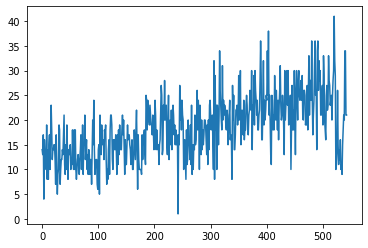

In [26]:
plt.plot(dataset)

In [27]:
# normalize the dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min()

0.0

In [28]:
# split into train and test sets
train_size = 363
test_size=181

In [29]:
train=dataset[0:train_size, :]
train.shape

(363, 1)

In [30]:
test=dataset[train_size:543, :]
test.shape

(180, 1)

In [31]:
# convert an array of values into a dataset matrix
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
# reshape into X=t and Y=t+1
look_back = 1
x_train,y_train = get_data(train, look_back)

In [33]:
x_train

array([[0.325],
       [0.3  ],
       [0.4  ],
       [0.075],
       [0.375],
       [0.3  ],
       [0.3  ],
       [0.225],
       [0.45 ],
       [0.175],
       [0.325],
       [0.175],
       [0.35 ],
       [0.4  ],
       [0.225],
       [0.375],
       [0.55 ],
       [0.425],
       [0.275],
       [0.325],
       [0.325],
       [0.35 ],
       [0.35 ],
       [0.275],
       [0.15 ],
       [0.4  ],
       [0.25 ],
       [0.1  ],
       [0.2  ],
       [0.225],
       [0.45 ],
       [0.425],
       [0.15 ],
       [0.225],
       [0.275],
       [0.275],
       [0.325],
       [0.3  ],
       [0.4  ],
       [0.5  ],
       [0.25 ],
       [0.2  ],
       [0.35 ],
       [0.225],
       [0.45 ],
       [0.325],
       [0.175],
       [0.325],
       [0.325],
       [0.3  ],
       [0.35 ],
       [0.225],
       [0.25 ],
       [0.25 ],
       [0.425],
       [0.3  ],
       [0.225],
       [0.425],
       [0.225],
       [0.425],
       [0.225],
       [0.175],
       [

In [34]:
y_train

array([0.3  , 0.4  , 0.075, 0.375, 0.3  , 0.3  , 0.225, 0.45 , 0.175,
       0.325, 0.175, 0.35 , 0.4  , 0.225, 0.375, 0.55 , 0.425, 0.275,
       0.325, 0.325, 0.35 , 0.35 , 0.275, 0.15 , 0.4  , 0.25 , 0.1  ,
       0.2  , 0.225, 0.45 , 0.425, 0.15 , 0.225, 0.275, 0.275, 0.325,
       0.3  , 0.4  , 0.5  , 0.25 , 0.2  , 0.35 , 0.225, 0.45 , 0.325,
       0.175, 0.325, 0.325, 0.3  , 0.35 , 0.225, 0.25 , 0.25 , 0.425,
       0.3  , 0.225, 0.425, 0.225, 0.425, 0.225, 0.175, 0.225, 0.275,
       0.3  , 0.25 , 0.2  , 0.275, 0.325, 0.4  , 0.225, 0.3  , 0.45 ,
       0.2  , 0.35 , 0.35 , 0.5  , 0.275, 0.325, 0.375, 0.225, 0.3  ,
       0.2  , 0.325, 0.3  , 0.2  , 0.275, 0.275, 0.15 , 0.3  , 0.475,
       0.35 , 0.575, 0.325, 0.2  , 0.25 , 0.275, 0.275, 0.15 , 0.125,
       0.325, 0.35 , 0.1  , 0.5  , 0.325, 0.3  , 0.45 , 0.375, 0.35 ,
       0.375, 0.275, 0.425, 0.4  , 0.45 , 0.275, 0.15 , 0.225, 0.175,
       0.325, 0.375, 0.2  , 0.425, 0.5  , 0.5  , 0.45 , 0.275, 0.225,
       0.375, 0.325,

In [35]:
x_test,y_test=get_data(test, look_back)

In [36]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [37]:
x_train.shape

(361, 1, 1)

In [38]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(x_train, y_train, epochs=100,batch_size=180)

Epoch 1/100
361/361 [==============================] - 1s 2ms/step - loss: 0.2179
Epoch 2/100
361/361 [==============================] - 0s 62us/step - loss: 0.2121
Epoch 3/100
361/361 [==============================] - 0s 67us/step - loss: 0.2066
Epoch 4/100
361/361 [==============================] - 0s 57us/step - loss: 0.2012
Epoch 5/100
361/361 [==============================] - 0s 55us/step - loss: 0.1958
Epoch 6/100
361/361 [==============================] - 0s 40us/step - loss: 0.1906
Epoch 7/100
361/361 [==============================] - 0s 57us/step - loss: 0.1855
Epoch 8/100
361/361 [==============================] - 0s 52us/step - loss: 0.1805
Epoch 9/100
361/361 [==============================] - 0s 58us/step - loss: 0.1755
Epoch 10/100
361/361 [==============================] - 0s 49us/step - loss: 0.1707
Epoch 11/100
361/361 [==============================] - 0s 53us/step - loss: 0.1659
Epoch 12/100
361/361 [==============================] - 0s 41us/step - loss: 0.1612
Ep

361/361 [==============================] - 0s 45us/step - loss: 0.0180
Epoch 99/100
361/361 [==============================] - 0s 68us/step - loss: 0.0178
Epoch 100/100
361/361 [==============================] - 0s 55us/step - loss: 0.0177


In [41]:
# make predictions
y_pred=model.predict(x_test)

In [42]:
 # invert predictions
y_pred=scaler.inverse_transform(y_pred)

In [43]:
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)

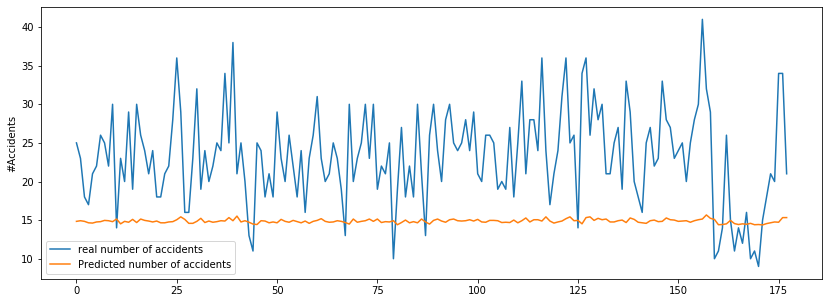

In [44]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label='real number of accidents')
plt.plot(y_pred,label='Predicted number of accidents')
plt.ylabel('#Accidents')
plt.legend()
plt.show()